 **Анализ бизнес-показателей Яндекс.Афиши**

**Цель проекта:** помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет. Для этого предстоит изучить: как клиенты пользуются сервисом, когда делают первые покупки на сайте,сколько денег приносит компании каждый клиент,когда расходы на привлечение клиента окупаются.

**Предмет исследования:** 

Данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

**Пути к файлам:**

визиты: /datasets/visits_log.csv                                                                                   
заказы: /datasets/orders_log.csv                                                                                   
расходы: /datasets/costs.csv. 

Выручка измеряется в условных единицах — у.е.

Описание данных приведено после подготовки данных к анализу.

Оглавление
<a class="ancor" id="step_0"></a>

* [1. Загрузка данных и подготовка их к анализу](#step_1)
 * [1.1. Загрузка данных и подготовка их к анализу данных по визитам](#step_2)
 * [1.2. Загрузка данных и подготовка их к анализу данных по заказам](#step_3)
 * [1.3. Загрузка данных и подготовка их к анализу данных по расходам](#step_4)
* [2. Расчет метрик и построение графиков](#step_5)
 * [2.1 Продуктовые метрики](#step_6)
  * [2.1.1 Расчет метрик MAU, WAU и DAU и измменение их во времени](#step_7)
  * [2.1.2  Частота посещения пользователями за день и изменение ее во времени](#step_8)
  * [2.1.3  Средняя продолжительность сессии за период](#step_9)
  * [2.1.4  Рачет Retention Rate посредством кагортного анализа](#step_10)
 * [2.2  Метрики электронной коммерции](#step_11)
  * [2.2.1  Среднее время совершения покупки с момента первого заказа](#step_12)
  * [2.2.2  Расчет среднего количества покупок](#step_13)
  * [2.2.3  Расчет средней выручки с пользователя. Изменение метрики с течением времени](#step_14)
  * [2.2.4  LTV по когортам](#step_15)
 * [2.3  Маркетинговые метрики](#step_16)
  * [.3.1  Общая сумма расходов. Расходы по источникам трафика](#step_17)
  * [2.3.2  САС по источникам](#step_18)
  * [2.3.3  ROMI по когортам. Окупаемость](#step_19)
* [Выводы и рекомендации](#step_20)


# Загрузка данных и подготовка их к анализу
<a class="ancor" id="step_1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

**Комментарий :**

Загружены необходимые для считывания и обработки и визуализации данных библиотеки.

##  Загрузка и подготовка их к анализу данных по визитам
<a class="ancor" id="step_2"></a>

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
print(visits.info())

visits.columns = ['device','end', 'source_id','start','uid' ]

print('Измененные названия столбцов:')
print(visits.columns)
print()
print('Уникальные  значения столбца device:', visits['device'].unique())
print()
print('Уникальные  значения столбца source_id:',visits['source_id'].unique())
print()
visits['end'] = visits['end'].astype('datetime64')
visits['start'] = visits['start'].astype('datetime64')

print('Проверка замены типа данных')
print(visits.dtypes)
print()

print('Количество "уникальных" посетителей:', visits['uid'].nunique())
display(visits.head()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
Измененные названия столбцов:
Index(['device', 'end', 'source_id', 'start', 'uid'], dtype='object')

Уникальные  значения столбца device: ['touch' 'desktop']

Уникальные  значения столбца source_id: [ 4  2  5  9  3  1 10  7  6]

Проверка замены типа данных
device               object
end          datetime64[ns]
source_id             int64
start        datetime64[ns]
uid                  uint64
dtype: object

Количество "уникальных" посетителей: 228169


,device,end,source_id,start,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
print(visits['start'].describe())
print(visits['end'].describe())
print()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start, dtype: object
count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end, dtype: object



In [4]:
visits[visits['start'] > visits['end']]

,device,end,source_id,start,uid
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


In [5]:
visits[visits['start'] == visits['end']]

,device,end,source_id,start,uid
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
28,desktop,2017-11-09 15:53:00,4,2017-11-09 15:53:00,17892541477379911957
32,desktop,2017-11-30 12:29:00,4,2017-11-30 12:29:00,13410401624913285510
54,desktop,2018-02-23 16:52:00,10,2018-02-23 16:52:00,13423278602430425332
...,...,...,...,...,...
358511,desktop,2017-09-15 11:31:00,4,2017-09-15 11:31:00,6406595666419694649
358514,desktop,2018-01-16 23:57:00,5,2018-01-16 23:57:00,6457848932283204350
358522,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743
358524,touch,2018-01-18 13:38:00,4,2018-01-18 13:38:00,4558073034499185861


In [6]:
visits = visits[visits['start'] <= visits['end']]
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359398 entries, 0 to 359399
Data columns (total 5 columns):
device       359398 non-null object
end          359398 non-null datetime64[ns]
source_id    359398 non-null int64
start        359398 non-null datetime64[ns]
uid          359398 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 16.5+ MB


**Комментарий:**

Загружены и изучены  данные  по визитам посредством  методов  read_csv () и info(), соответственно. 
В названиях столбцов  были заглавные буквы и пробелы, поэтому была произведена замена названий столбцов.
Далее  данные столбцов были изучены данные  посредством методов unique() и describe(), также была произведен замена строкового типа данных  на временной в столбцах End Ts  и  Start Ts. Выявлено, что для 2 визитов время конца визита меньше, чем время начала, что противоречит логике. При этом устройство, с которого был осуществлен визит одно и тоже,  дата и время сопоставими, можно предположить технический сбой. Эти строки удалили из дальнейшего анализа. Кроме того, обращает на себя внимание, что в 10% визитов время начала и конца визита равны, т.е. продолжительность визита 0.

*Описание данных visits*

device  (изначально, Device)   -    устройство ( связь/компьютер)                                                  
end (End Ts) -       конец визита                                                                         
source_id (Source Id) -    идентификатор трафика                                                         
start (Start Ts) -    начало визита                                                                                
uid (Uid) -        идентификатор пользователя

## Загрузка данных и подготовка их к анализу данных по заказам
<a class="ancor" id="step_3"></a>

In [7]:
orders = pd.read_csv('/datasets/orders_log.csv')
print(orders.info())
orders.columns = ['buy', 'revenue', 'uid']
display(orders.head())
orders['buy'] = orders['buy'].astype('datetime64')

print()
print(orders['revenue'].describe())
print()
print(orders['buy'].describe())
print()
print('Количество уникальных покупателей', orders['uid'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


,buy,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy, dtype: object

Количество уникальных покупателей 36523


In [8]:
orders[orders['revenue'] == 0].count()

buy        51
revenue    51
uid        51
dtype: int64

**Комментарий :**

Загружены и изучены  данные по заказам посредством  методов  read_csv () и info(), соответственно. 
В названиях столбцов  были заглавные буквы и пробелы, поэтому была произведена замена названий столбцов.
Были изучены данные  посредством методов unique() и describe() и замена строкового типа данных  на временной в столбце Buy Ts.
В 1% покупок выручка равна 0, возможно это комплимент, подарок от компании, периоды покупкок и визитов логически соответствуют друг другу. Количество покупателей не превышает количество визитеров (вычислено nunique()


*Описание данных orders*

buy (Buy Ts) -     дата и время заказа                                                                                     
revenue (Revenue) -    выручка, у.е.                                                                                           
uid (Uid) -      идентификатор пользователя

## Загрузка данных и подготовка их к анализу данных по расходам
<a class="ancor" id="step_4"></a>

In [9]:
costs = pd.read_csv('/datasets/costs.csv')
print(costs.info())
display(costs.head())
print(costs['source_id'].unique())
print()
costs['dt'] = costs['dt'].astype('datetime64')

print()
print(costs['dt'].describe())
print()
print(costs['costs'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


[ 1  2  3  4  5  9 10]


count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


**Комментарий :**

Загружены и изучены  данные  по расходам посредством  методов  read_csv () и info(), соответственно. 
Использовались методы unique() и describe() и произведена замена строкового типа данных dt датасета costs. Аномалий не выявлено.

*Описание данных costs*

source_id -  идентификатор трафика                                                                                 
dt   -        дата расхода                                                                                 
costs   -     расход, у.е.

In [10]:
print('Период даты и времени окончания визитов:', visits['end'].min(),'-', visits['end'].max())
print('Период даты и времени начала визитов:', visits['start'].min(), '-',visits['start'].max())
print('Период заказов', orders['buy'].min(), '-', orders['buy'].max())
print('Период расходов:', costs['dt'].min(), '-', costs['dt'].max())

Период даты и времени окончания визитов: 2017-06-01 00:02:00 - 2018-06-01 01:26:00
Период даты и времени начала визитов: 2017-06-01 00:01:00 - 2018-05-31 23:59:00
Период заказов 2017-06-01 00:10:00 - 2018-06-01 00:02:00
Период расходов: 2017-06-01 00:00:00 - 2018-05-31 00:00:00


**Комментарий :**

Периоды визитов, расходов, заказов сопоставимы.

**ВЫВОД:**

Данные по визитам, расходам и заказам подготовлены для анализа.

# Расчет метрик и построение графиков
<a class="ancor" id="step_5"></a>

## Продуктовые метрики 
<a class="ancor" id="step_6"></a>

### Расчет метрик MAU, WAU и DAU и изменение их во времени
<a class="ancor" id="step_7"></a>

Среднее количество уникальных пользователей в день (DAU) за период: 907
Среднее количество уникальных пользователей за неделю (WAU) за период: 5716
Среднее количество уникальных пользователей за месяц (MAU) за период: 23228


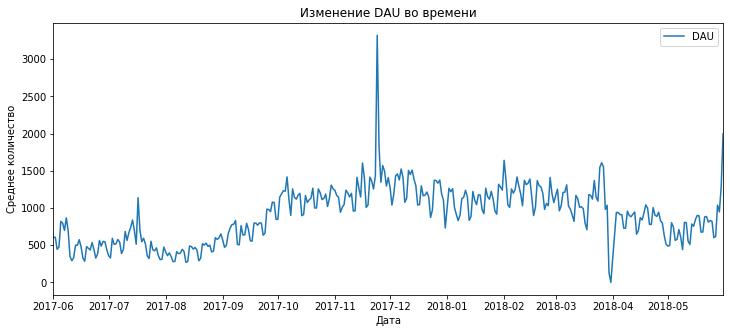

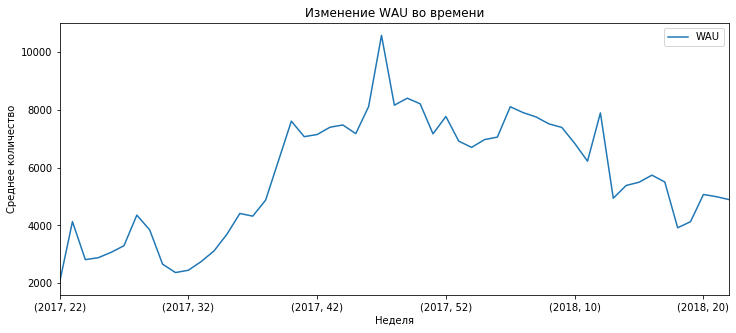

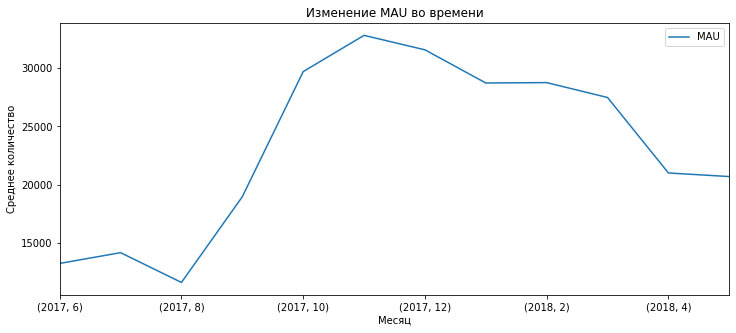

In [11]:
visits['year'] = visits['start'].dt.year
visits['month'] = visits['start'].dt.month
visits['week'] = visits['start'].dt.week
visits['date'] = visits['start'].dt.date

dau_total = visits.groupby('date').agg({'uid' : 'nunique'}).mean()
wau_total = visits.groupby(['year','week']).agg({'uid' : 'nunique'}).mean()
mau_total = visits.groupby(['year','month']).agg({'uid' : 'nunique'}).mean()

print('Среднее количество уникальных пользователей в день (DAU) за период:', int(dau_total))
print('Среднее количество уникальных пользователей за неделю (WAU) за период:', int(wau_total))
print('Среднее количество уникальных пользователей за месяц (MAU) за период:',int(mau_total))

visits.pivot_table(index = 'date', aggfunc = {'uid' : 'nunique'}).plot(figsize = (12,5))
plt.title("Среднее количество уникальных пользователей в день")
plt.xlabel('Дата')
plt.ylabel('Среднее количество')
plt.legend(['DAU'])
plt.title("Изменение DAU во времени")
plt.show()
visits.pivot_table(index = ['year','week'], values = 'uid', aggfunc = {'uid' : 'nunique'}).plot(figsize = (12,5))
plt.xlabel('Неделя')
plt.ylabel('Среднее количество')
plt.legend(['WAU'])
plt.title("Изменение WAU во времени")
plt.show()
visits.pivot_table(index = ['year','month'], values = 'uid', aggfunc = {'uid' : 'nunique'}).plot(figsize = (12,5))
plt.xlabel('Месяц')
plt.ylabel('Среднее количество')
plt.legend(['MAU'])
plt.title("Изменение MAU во времени")
plt.show()

In [12]:
print('Недельная степень вовлечения пользователей:', dau_total / wau_total*100)
print('Месячная степень вовлечения пользователей:', dau_total / mau_total*100)

Недельная степень вовлечения пользователей: uid    15.884409
dtype: float64
Месячная степень вовлечения пользователей: uid    3.90897
dtype: float64


**ВЫВОД:**

Вовлечение пользователей в сервис Яндекс.Афиши изменяется во времени, можно предположить сезонную зависимость,  количество посетеителей было выше в осенне-зимний период и с наступлением тепла в апреле пошло на спад.            
Следует отметить, в среднем приложение популярно у пользователей.                                                   
Недельный Sticky factor порядка 16%, месячный - 4%.

### Частота посещения  пользователями  за день и изменение ее во времени
<a class="ancor" id="step_8"></a>

Для расчета среднего количества посещений Яндекс.Афиши пользователями в день, мы разделим число сессий на количество пользователей (уникальных) за день. Для получения сводки средних количеств посещений Яндекс.Афиши пользователями в день используем метод describe().Посредством него вычислим среднее значение, стандартное отклонение, минимальное значение, максимальное значение, 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениямиб подсчитаем количество переменных в наборе данных.

1.0824875552419868
count    364.000000
mean       1.082166
std        0.020873
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: visits_mean, dtype: float64


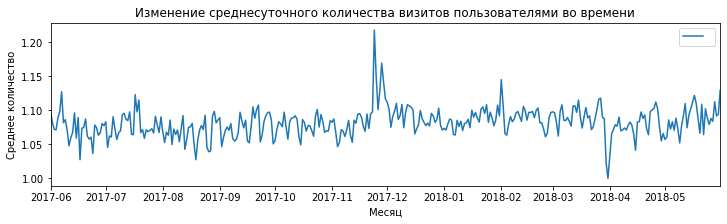

In [13]:
visits_per_user_per_date = visits.groupby(['date']).agg({'uid': ['count' , 'nunique']})
visits_per_user_per_date.columns = ['count', 'n_users']

visits_per_user_per_date['visits_mean'] = visits_per_user_per_date['count'] / visits_per_user_per_date['n_users']
print(visits_per_user_per_date['visits_mean'].median())

print(visits_per_user_per_date['visits_mean'].describe())

visits_per_user_per_date['visits_mean'].plot(figsize = (12,3))
plt.xlabel('Месяц')
plt.ylabel('Среднее количество')
plt.legend([''])
plt.title("Изменение среднесуточного количества визитов пользователями во времени")
plt.show()

**ВЫВОД**

В день один пользователь в среднем проводит в приложении 1 сессию.  

### Средняя продолжительность сессии за период
<a class="ancor" id="step_9"></a>

Средняя продолжительность визита, cek: 300.0
Продолжительность визита чаще всего, cek:
0    60
dtype: int64


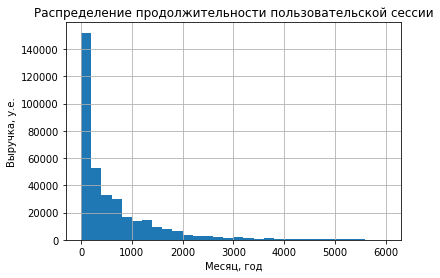

In [14]:
visits['duration_sec'] = (visits['end'] -  visits['start']).dt.seconds

print('Средняя продолжительность визита, cek:',visits['duration_sec'].median()) 

print('Продолжительность визита чаще всего, cek:')
print(visits['duration_sec'].mode()) 

visits['duration_sec'].hist(bins=30, range = (0,6000)) 
plt.title('Распределение продолжительности пользовательской сессии')
plt.xlabel("Месяц, год")
plt.ylabel("Выручка, у.е.")
plt.show()

**ВЫВОД**


Средняя продолжительность визита (медианное значение) порядка 5 мин. Чаще всего пользователи проводит в сервисе около минуты.

### Рачет Retention Rate посредством кагортного анализа
<a class="ancor" id="step_10"></a>

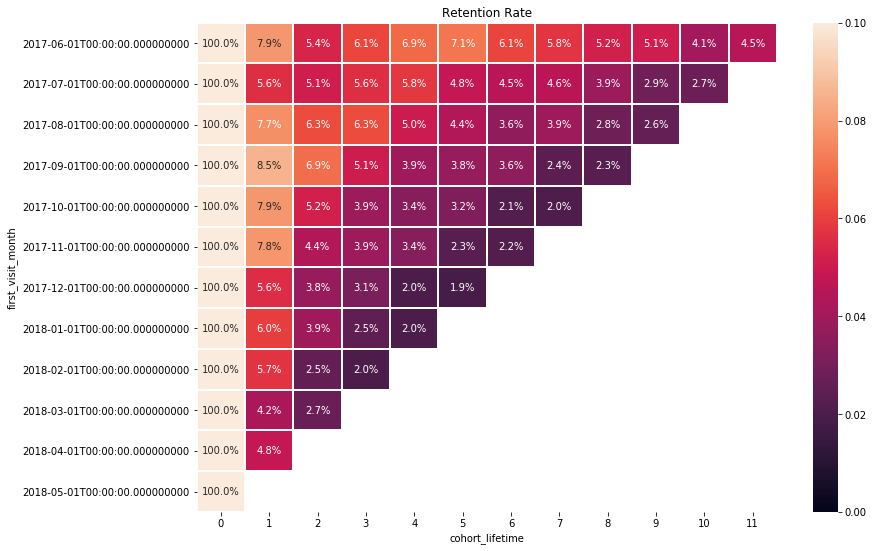

In [15]:
import datetime
first_visit = visits.groupby('uid')['start'].min()
first_visit.name = 'first_visit'
visits = visits.merge(first_visit, on = 'uid') 

visits['month'] = visits['start'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')

visits['cohort_lifetime'] = visits['month'] - visits['first_visit_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].apply(np.round).astype('int')

visits.head()

cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
 
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
 
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',
                                      columns='cohort_lifetime',values='retention',aggfunc='sum') 

plt.figure(figsize=(13, 9))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, vmin=0, vmax=0.1, linecolor='white'); 


**ВЫВОД**


Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.Больше всего удалось удержать пользователей из кагорты июня 2017 г за весь период, на второй месяц   максимально в процентном отношении 8,5 %  пользователей  кагорты купили сентября 2017 г повторно.   


## Метрики электронной коммерции
<a class="ancor" id="step_11"></a>

### Среднее время  совершения покупки  с момента первого посещения
<a class="ancor" id="step_12"></a>

In [16]:
first_visit = visits[visits['start'] == visits['first_visit']]

first_buy= orders.groupby('uid')['buy'].min()
first_buy.name = 'first_buy'
orders = orders.join(first_buy, on='uid')
first_order = orders[orders['buy'] == orders['first_buy']]
first = first_visit.join(first_buy, on = 'uid')
first['period'] = (first['first_buy'] - first['first_visit']).dt.seconds

period_for_first_buy =first.pivot_table(index = 'uid', values ='period', aggfunc = 'mean')

print(period_for_first_buy.describe())
print()
print("Распределения без нулевых значений периода")
print(period_for_first_buy[period_for_first_buy['period'] != 0].describe())

             period
count  36523.000000
mean   14949.881445
std    25784.567076
min        0.000000
25%      240.000000
50%      960.000000
75%    15120.000000
max    86340.000000

Распределения без нулевых значений периода
             period
count  34056.000000
mean   16032.843552
std    26375.041400
min       60.000000
25%      300.000000
50%     1200.000000
75%    18600.000000
max    86340.000000


**ВЫВОД** 

В среднем (по медиане) проходит 960 сек (16 мин) с момента первого посещения сайта  до совершения первой покупки.Обращает на себя внимание, что есть покупки, которые совершались сразу,т.е.  время принятия решения 0 сек.Если убрать эти строки, то среднее время совершения покупки с момента первого посещения увеличится до 20 мин.

### Расчет среднего количества покупок
<a class="ancor" id="step_13"></a>

In [17]:
orders['date'] = orders['buy'].dt.date
orders['month'] = orders['buy'].dt.month
orders['year'] = orders['buy'].dt.year
orders['order_month'] = orders['date'].astype('datetime64[M]')

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
print(first_orders.head()) 

orders_new = pd.merge(orders,first_orders)
print(orders_new.info()) 

cohort_buy_mean = orders_new.groupby(['first_order_month','order_month'])\
.agg({'uid':['nunique','count']}).reset_index()
cohort_buy_mean.columns = ['first_order_month','order_month', 'n_buys', 'count_buys']
cohort_buy_mean['buys_month'] = cohort_buy_mean['count_buys'] / cohort_buy_mean['n_buys']
cohort_buy_mean_pivot = cohort_buy_mean.pivot_table(index='first_order_month', columns = 'order_month', \
                            values = 'buys_month', aggfunc = 'mean').round(1)
cohort_buy_mean_pivot.fillna('')

                uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 9 columns):
buy                  50415 non-null datetime64[ns]
revenue              50415 non-null float64
uid                  50415 non-null uint64
first_buy            50415 non-null datetime64[ns]
date                 50415 non-null object
month                50415 non-null int64
year                 50415 non-null int64
order_month          50415 non-null datetime64[ns]
first_order_month    50415 non-null datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(1), uint64(1)
memory usage: 3.8+ MB
None


order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,1.2,2.9,3.5,4.2,3.3,3.3,4.5,3.7,3.7,3.4,2.1,1.6,
2017-07-01,,1.1,1.9,2.1,1.6,1.5,2.2,1.7,1.3,1.4,1.1,2,
2017-08-01,,,1.1,1.9,1.9,1.8,2.1,1.9,1.6,1.8,2.4,1.5,
2017-09-01,,,,1.1,1.7,1.6,2.2,1.3,1.7,1.6,1.5,1.4,
2017-10-01,,,,,1.1,1.5,1.3,1.3,1.4,1.4,1.5,1.9,
2017-11-01,,,,,,1.2,1.8,1.5,2,1.7,1.2,1.6,
2017-12-01,,,,,,,1.2,1.8,2,1.8,1.7,1.7,
2018-01-01,,,,,,,,1.1,2,1.9,1.5,1.7,
2018-02-01,,,,,,,,,1.1,1.9,1.4,1.8,


In [18]:
m6_cum_buy = cohort_buy_mean_pivot.cumsum(axis=1).mean(axis=0)[5]
print('Среднее количество покупок за 6 месяцев на 1 клиента:', m6_cum_buy.round(2))

Среднее количество покупок за 6 месяцев на 1 клиента: 6.92


**ВЫВOД**

Среднее количество покупок за 6 месяцев на 1 клиента  - 7

### Расчет средней выручки с пользователя. Изменение метрики с течением времени.
<a class="ancor" id="step_14"></a>

Средняя выручка за период с пользователя: 3.05


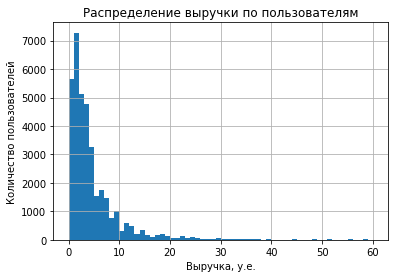

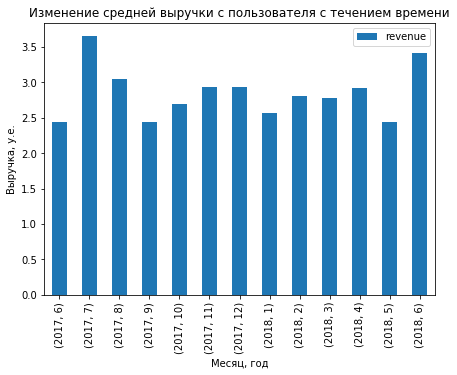

In [19]:
revenue_per_user = orders.pivot_table(index = 'uid', values = 'revenue', aggfunc = 'sum')

#display(revenue_per_user.head())
print('Средняя выручка за период с пользователя:', revenue_per_user['revenue'].median().round(2))

revenue_per_user['revenue'].hist(bins=60, range = (0,60))
plt.title("Распределение выручки по пользователям")
plt.xlabel("Выручка, у.е.")
plt.ylabel("Количество пользователей")
plt.show()

revenue_per_user_month = (orders
                          .pivot_table(index = ['year', 'month','uid'], values = 'revenue', aggfunc = 'sum')
                          .reset_index())
                            
(revenue_per_user_month
 .pivot_table(index = ['year','month'], values = 'revenue', aggfunc = 'median')
 .plot(kind = 'bar', figsize = (7,5)))
plt.title("Изменение средней выручки c пользователя с течением времени")
plt.xlabel("Месяц, год")
plt.ylabel("Выручка, у.е.")
plt.show()

**ВЫВОД**

Средняя выручка за период с пользователя: 3.05.
Средняя выручка за период с пользователя изменялась в исследуемый период, она была максимальна в июле 2017 и июне 2018, около 3, 5 у.е.

### LTV по кагортам
<a class="ancor" id="step_15"></a>

In [20]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

margin_rate = 1
    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(1)

output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.7,0.5,0.4,1,1,0.7,1,0.6,0.6,0.6,0.6,0.3
2017-07-01,6.0,0.3,0.6,0.4,0.2,0.2,0.1,0.1,0.2,0.1,0.2,
2017-08-01,5.3,0.5,0.5,0.4,0.5,0.3,0.2,0.4,0.3,0.2,,
2017-09-01,5.6,1.1,0.5,4,0.4,0.6,0.7,0.2,0.2,,,
2017-10-01,5.0,0.5,0.2,0.2,0.2,0.1,0.1,0.1,,,,
2017-11-01,5.2,0.4,0.2,0.3,0.1,0.1,0.1,,,,,
2017-12-01,4.7,0.3,0.9,1.1,0.3,0.3,,,,,,
2018-01-01,4.1,0.3,0.3,0.1,0.1,,,,,,,
2018-02-01,4.2,0.3,0.1,0.1,,,,,,,,


In [21]:
m6_cum_ltv = output.cumsum(axis=1).mean(axis=0)[5]
print('Средний LTV за 6 месяцев после первой покупки:', m6_cum_ltv)

Средний LTV за 6 месяцев после первой покупки: 7.971428571428572


In [22]:
print('LTV за 6 месяцев когорты 2017_06:', output.loc['2017-06-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_07:', output.loc['2017-07-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_08:', output.loc['2017-08-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_09:', output.loc['2017-09-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_10:', output.loc['2017-10-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_11:', output.loc['2017-11-01'].cumsum(axis=0)[5])
print('LTV за 6 месяцев когорты 2017_12:', output.loc['2017-12-01'].cumsum(axis=0)[5])

LTV за 6 месяцев когорты 2017_06: 8.3
LTV за 6 месяцев когорты 2017_07: 7.7
LTV за 6 месяцев когорты 2017_08: 7.5
LTV за 6 месяцев когорты 2017_09: 12.2
LTV за 6 месяцев когорты 2017_10: 6.2
LTV за 6 месяцев когорты 2017_11: 6.3
LTV за 6 месяцев когорты 2017_12: 7.6


**ВЫВОД**

В среднем каждый покупатель принес по 8 у.е за 6 месяцев «жизни».
Больше всего выручка с каждого покупателя когорты  сентября 2017 за 6 месяцев.

## Маркетинговые метрики
<a class="ancor" id="step_16"></a>

### Общая сумма расходов. Расходы по источникам трафика
<a class="ancor" id="step_17"></a>

Общая сумма расходов на маркетинг 329131.62 у.е.


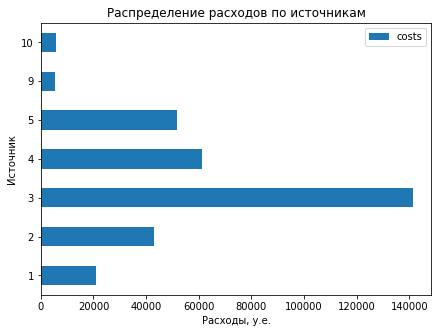

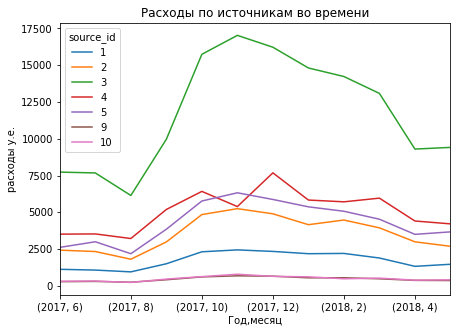

In [23]:
costs.head()
print('Общая сумма расходов на маркетинг', costs['costs'].sum(), 'у.е.')

costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum').plot(kind = 'barh', figsize = (7,5))
plt.title("Распределение расходов по источникам")
plt.xlabel("Расходы, у.е.")
plt.ylabel("Источник")
plt.show()

costs['month'] = costs['dt'].dt.month
costs['year'] = costs['dt'].dt.year

(costs
 .pivot_table(index = ['year','month'], columns = 'source_id', values = 'costs', aggfunc = 'sum')
 .plot(figsize = (7,5)))
plt.title("Расходы по источникам во времени")
plt.xlabel("Год,месяц")
plt.ylabel("расходы у.е.")
plt.show()

**ВЫВОД**

Больше всего было инвестировано в 3 источник трафика, меньше всего в 9 и 10. Расходов на 6,7,8 источники трафика не было.  

### САС по источникам
<a class="ancor" id="step_18"></a>

In [24]:
first.pivot_table(index = 'source_id', values = 'first_buy', aggfunc = 'count')
first_source_id = first.groupby('source_id').agg({'first_buy' : 'count'}).reset_index()
costs_source_id = costs.pivot_table(index = 'source_id', values = 'costs', aggfunc = 'sum').reset_index()
source_id = costs_source_id.merge(first_source_id, on = 'source_id')

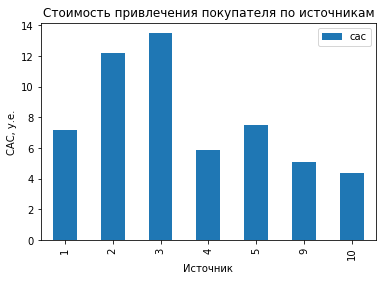

,source_id,costs,first_buy,cac
0,1,20833.27,2899,7.2
1,2,42806.04,3506,12.2
2,3,141321.63,10473,13.5
3,4,61073.60,10296,5.9
4,5,51757.10,6931,7.5
5,9,5517.49,1088,5.1
6,10,5822.49,1329,4.4


In [25]:
source_id['cac'] = (source_id['costs'] / source_id['first_buy']).round(1)

source_id.plot(kind = 'bar', x = 'source_id', y = 'cac')
plt.title("Стоимость привлечения покупателя по источникам")
plt.xlabel("Источник")
plt.ylabel("САС, у.е.")
plt.show()
source_id

**ВЫВОД**

Наибольшая стоимость привлечения клиента  у 2 и 3 источника трафика 13,5 и 12,2, соотвественно, в то время как количество покупателей 10 473 и 3 506. Источник 4 интересен по этой метрике, цена привлечения в  более 2 раза ниже, чем у 3 источника, а количество покупателей сопоставимо 10 296.  Следует обратить внимание  и  на источник 5, стоимость привлечения относительно невысокая 7,5 у.е. и достаточно большое количество покупателей 6 931.

### ROMI:  окупаемость и в разрезе источников по когортам
<a class="ancor" id="step_19"></a>

In [26]:
costs['date_month'] = costs['dt'].astype('datetime64[M]') 
monthly_costs = costs.groupby(['date_month'])['costs'].sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='date_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']
output1 = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output1.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


In [27]:
output1.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

In [28]:
first_new = first.dropna()
first_new=first_new.loc[:,['device', 'uid', 'source_id']]
orders_ltv = pd.merge(orders, first_new, on = 'uid') 

orders_ltv['first_order_month'] = orders_ltv['first_buy'].astype('datetime64[M]') 

orders_ltv_new = orders_ltv.groupby(['source_id', 'first_order_month',]).agg({'revenue' : 'sum'}).reset_index()
orders_ltv_new.columns  = ['source_id', 'first_order_month', 'revenue']   
orders_ltv_new                          

,source_id,first_order_month,revenue
0,1,2017-06-01,6392.39
1,1,2017-07-01,3342.52
2,1,2017-08-01,2110.91
3,1,2017-09-01,2364.55
4,1,2017-10-01,2850.08
...,...,...,...
81,10,2018-01-01,292.93
82,10,2018-02-01,319.02
83,10,2018-03-01,657.44
84,10,2018-04-01,261.93


In [29]:
orders_ltv_1 = orders_ltv.pivot_table(index = ['first_order_month', 'source_id'], values = 'revenue', aggfunc = 'sum').reset_index()
orders_ltv_1.columns = ['first_order_month', 'source_id', 'revenue']
x = costs.pivot_table(index = ['date_month','source_id'], values = 'costs', aggfunc = 'sum').reset_index()
x.columns = ['first_order_month', 'source_id', 'costs']
y = pd.merge(orders_ltv_1, x, on = ['first_order_month', 'source_id'])
y

,first_order_month,source_id,revenue,costs
0,2017-06-01,1,6392.39,1125.61
1,2017-06-01,2,3915.26,2427.38
2,2017-06-01,3,3640.32,7731.65
3,2017-06-01,4,4992.67,3514.80
4,2017-06-01,5,4377.64,2616.12
...,...,...,...,...
79,2018-05-01,3,3256.54,9411.42
80,2018-05-01,4,3802.91,4214.21
81,2018-05-01,5,2094.04,3669.56
82,2018-05-01,9,223.05,362.17


In [30]:
y['romi'] = y['revenue'] / y['costs']
romi_cahort = y.pivot_table(index = 'first_order_month', columns = 'source_id', values = 'romi', aggfunc = 'mean')

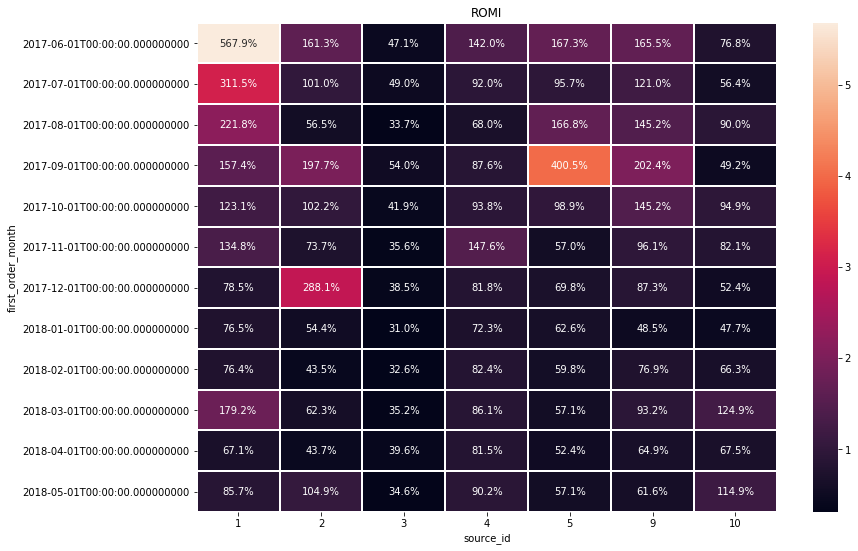

In [31]:
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(romi_cahort, annot=True, fmt='.1%', linewidths=1, linecolor='white'); 

**ВЫВОД**

У 3 источника  ни в одной когорте затраты не окупились

Окупились когорты 1 и 9, остальные убыточны, в среднем когорты могут начать окупаться, начиная с 8 месяца. 

У 1 и 2 источника трафика  окупились по  6 когорт, при этом ROMI когорты июня 2017 величина порядка 500 %, визитеры из этих источников могут стать очень выгодными покупателями.

<a class="ancor" id="step_20"></a>
# Выводы и рекомендации

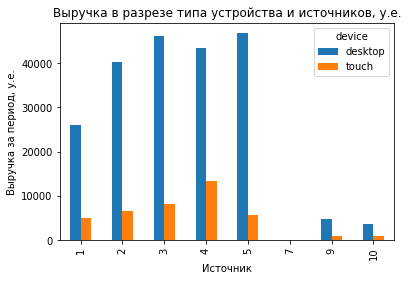

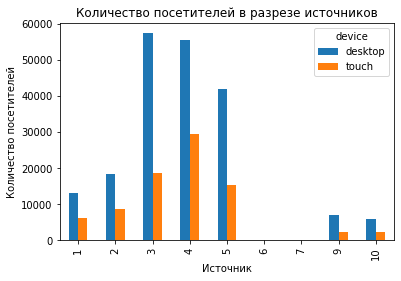

In [32]:
orders_ltv.pivot_table(index = 'source_id', columns = 'device', values = 'revenue', aggfunc = 'sum').plot(kind = 'bar')
plt.xlabel("Источник")
plt.ylabel("Выручка за период, у.е.")
plt.title("Выручка в разрезе типа устройства и источников, у.е.")
plt.show()
visits.pivot_table(index = 'source_id', columns = 'device',values = 'uid', aggfunc = 'nunique').plot(kind = 'bar')
plt.xlabel("Источник")
plt.ylabel("Количество посетителей")
plt.title("Количество посетителей в разрезе источников")
plt.show()

In [33]:
visits_source_id = visits.pivot_table(index = 'source_id', values = 'uid', aggfunc ={'uid':'nunique'}).reset_index()
visits_source_id.columns = ['source_id', 'n_visits']

buys_source_id = orders_ltv.groupby(['source_id']).agg({'uid' : 'nunique', 'revenue' : 'sum'}).reset_index()
buys_source_id.columns = ['source_id', 'n_orders', 'revenue']

metriki = pd.merge(visits_source_id, buys_source_id, on = 'source_id')
metriki['conv, %'] = (metriki['n_orders'] / metriki['n_visits'] * 100).round(1)
source_id_new = source_id.loc[:,['source_id', 'cac']]
metriki_new = pd.merge(metriki, source_id_new, on = 'source_id')
metriki_new ['ltv'] = (metriki_new ['revenue'] / metriki_new ['n_orders']).round(1)
metriki_new ['romi'] = (metriki_new ['ltv'] / metriki_new ['cac']).round(2)
print('Метрики в разрезе устройств')
metriki_new 

Метрики в разрезе устройств


,source_id,n_visits,n_orders,revenue,"conv, %",cac,ltv,romi
0,1,18999,2899,31090.55,15.3,7.2,10.7,1.49
1,2,26245,3506,46923.61,13.4,12.2,13.4,1.10
2,3,74756,10473,54511.24,14.0,13.5,5.2,0.39
3,4,83525,10296,56696.83,12.3,5.9,5.5,0.93
4,5,56974,6931,52624.02,12.2,7.5,7.6,1.01
5,9,9264,1088,5759.40,11.7,5.1,5.3,1.04
6,10,8067,1329,4450.33,16.5,4.4,3.3,0.75


 **Выводы и рекомендации**

1.Графики распределения и распределения пользователей по типам устройств и источникам трафика свидетельствуют, что
большинство пользователей узнали о ресурсе Яндекс.Афиша  с компьютера независимо какой источник трафика они использовали, а не с мобильного устройства. Значительная часть выручки "пришла" от покупателей, которые увидели рекламу на компьютере. Из чего можно сделать рекомендацию маркетологам поставить в приоритет рекламу на компьютерах.


2.Для оптимизации расходов затраты на рекламу по 3, 4 источнику трафика  имеет смысл перераспределить на другие источники (особенно у 3 источника, он  наиболее убыточен), а именно на 1, затраты по которому окупаются на величину порядка 50 % (romi 1,49),2, 9 и 5.

Однако, стоит обратить внимание, что большая часть визитов и покупок были совершены благодаря 3 и 4 источнику, возможно, там более удачно преподнесена информация о Яндекс.Афише и стоит дать рекламу в других источниках по аналогии с этими источниками трафика.


3.Самые перспективные для компании когорты  - июнь и сентябрь 2017 г. 